# PROJECT OF BREAST CANCER CLASSIFICATION 

## The task  to predict if cancer diagnosis is begnin or malignant based on features provided

#### Importing the librairies and the dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
print(cancer['target_names'])

['malignant' 'benign']


In [10]:
print(cancer['filename'])

/home/plass/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/breast_cancer.csv


In [11]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
cancer['data'].shape

(569, 30)

In [4]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'],['target']))

In [5]:
df_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

In [6]:
df_cancer.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

### Visualizing the Data

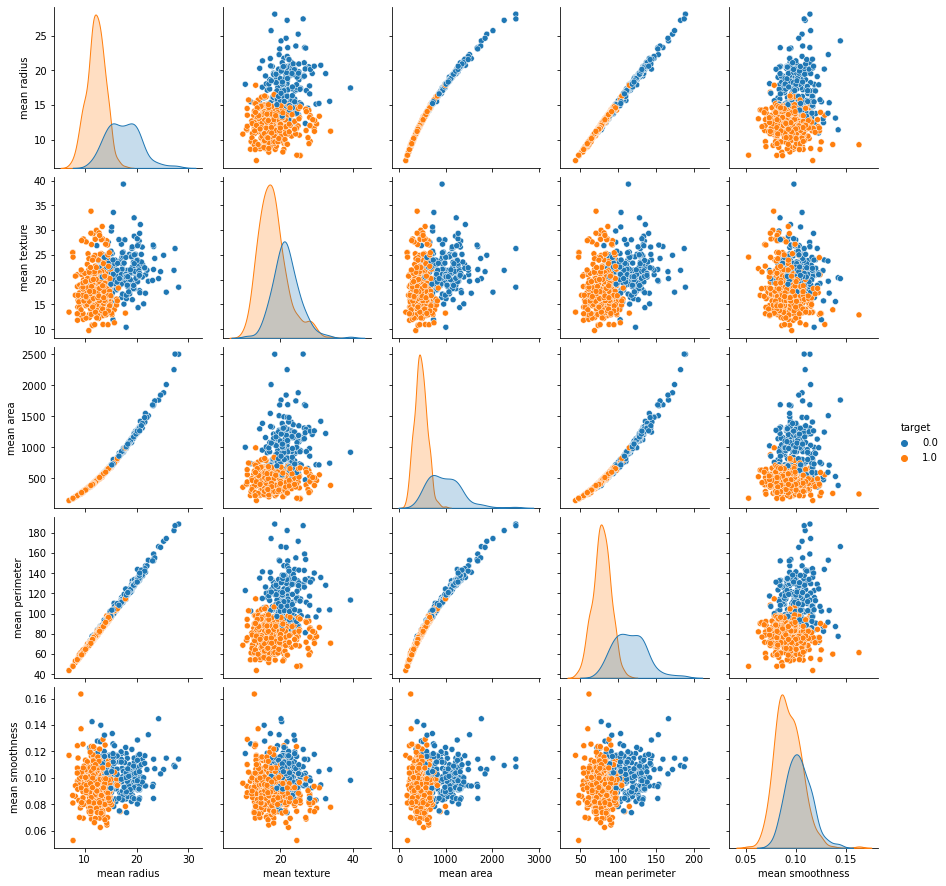

In [7]:
sns.pairplot(df_cancer, hue='target', vars=[ 'mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness']);

/home/plass/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


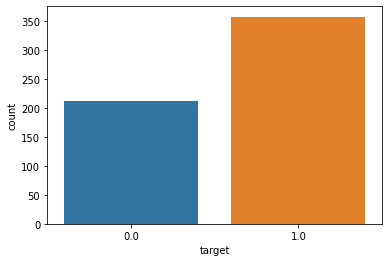

In [8]:
 sns.countplot(df_cancer['target']);

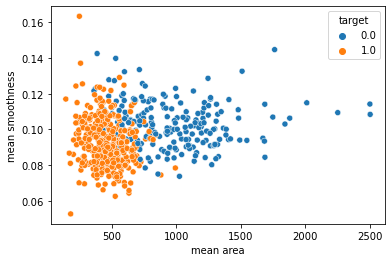

In [9]:
sns.scatterplot(x='mean area', y= 'mean smoothness' , hue = 'target', data=df_cancer);

<AxesSubplot:>

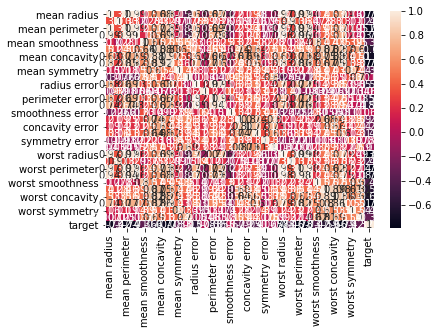

In [10]:
sns.heatmap(df_cancer.corr(), annot=True)

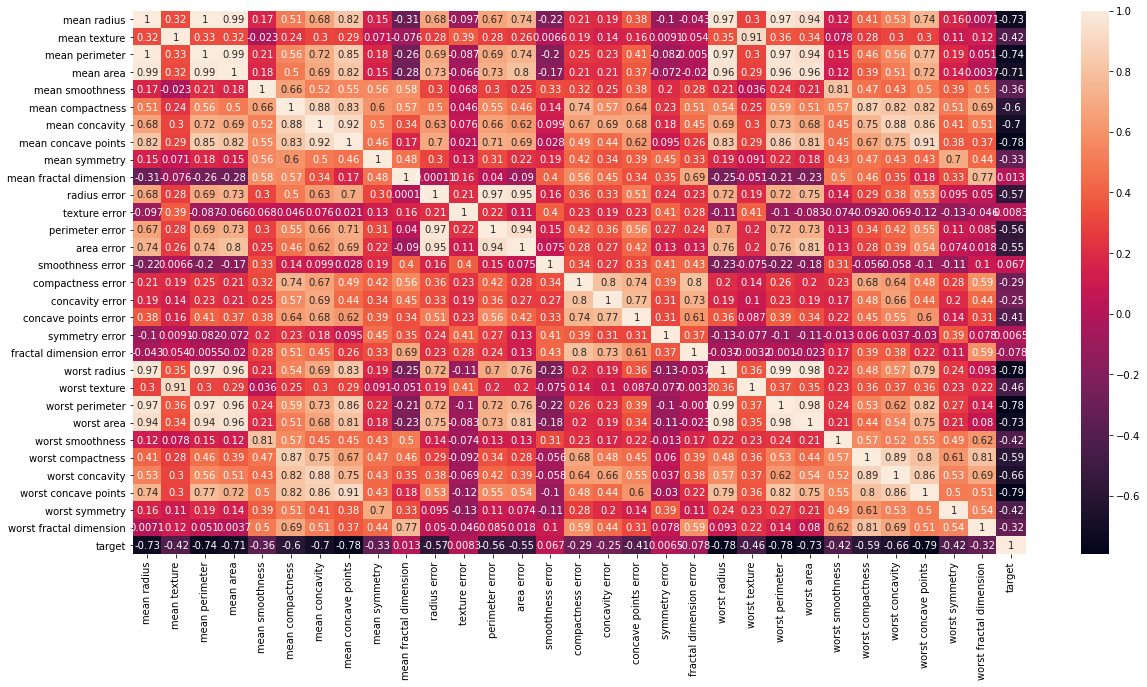

In [11]:
plt.figure(figsize= (20,10));
sns.heatmap(df_cancer.corr(), annot=True);

### Training the model

In [12]:
 X = df_cancer.drop(['target'], axis = 1)

In [13]:
X.tail(6)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
563           0.22360         0.31740              0.14740         0.2149   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
563                 0.06879  ...        24.290          29.41   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
563           179.10      1819.0           0.14070            0.41860   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
563           0.6599                0.2542          0.2929   
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     worst fractal dimension  
563                  0.09873  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[6 rows x 30 columns]

In [14]:
y = df_cancer['target']

In [30]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

In [50]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306       13.200         15.82           84.07      537.3          0.08511   
410       11.360         17.57           72.49      399.8          0.08858   
197       18.080         21.84          117.40     1024.0          0.07371   
376       10.570         20.22           70.15      338.3          0.09073   
244       19.400         23.50          129.10     1155.0          0.10270   
..           ...           ...             ...        ...              ...   
8         13.000         21.82           87.50      519.8          0.12730   
73        13.800         15.79           90.43      584.1          0.10070   
400       17.910         21.02          124.40      994.0          0.12300   
118       15.780         22.91          105.70      782.6          0.11550   
206        9.876         17.27           62.92      295.4          0.10890   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306           0.05251        0.001461             0.003261         0.1632   
410           0.05313        0.027830             0.021000         0.1601   
197           0.08642        0.110300             0.057780         0.1770   
376           0.16600        0.228000             0.059410         0.2188   
244           0.15580        0.204900             0.088860         0.1978   
..                ...             ...                  ...            ...   
8             0.19320        0.185900             0.093530         0.2350   
73            0.12800        0.077890             0.050690         0.1662   
400           0.25760        0.318900             0.119800         0.2113   
118           0.17520        0.213300             0.094790         0.2096   
206           0.07232        0.017560             0.019520         0.1934   

     mean fractal dimension  ...  worst radius  worst texture  \
306                 0.05894  ...         14.41          20.45   
410                 0.05913  ...         13.05          36.32   
197                 0.05340  ...         19.76          24.70   
376                 0.08450  ...         10.85          22.82   
244                 0.06000  ...         21.65          30.53   
..                      ...  ...           ...            ...   
8                   0.07389  ...         15.49          30.73   
73                  0.06566  ...         16.57          20.86   
400                 0.07115  ...         20.80          27.78   
118                 0.07331  ...         20.19          30.50   
206                 0.06285  ...         10.42          23.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306            92.00       636.9           0.11280             0.1346   
410            85.07       521.3           0.14530             0.1622   
197           129.10      1228.0           0.08822             0.1963   
376            76.51       351.9           0.11430             0.3619   
244           144.90      1417.0           0.14630             0.2968   
..               ...         ...               ...                ...   
8             106.20       739.3           0.17030             0.5401   
73            110.30       812.4           0.14110             0.3542   
400           149.60      1304.0           0.18730             0.5917   
118           130.30      1272.0           0.18550             0.4925   
206            67.08       331.6           0.14150             0.1247   

     worst concavity  worst concave points  worst symmetry  \
306          0.01120               0.02500          0.2651   
410          0.18110               0.08698          0.2973   
197          0.25350               0.09181          0.2369   
376          0.60300               0.14650          0.2597   
244          0.34580               0.15640          0.2920   
..               ...                   ...             ...   
8            0.53900               0.20600         

In [36]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306       13.200         15.82           84.07      537.3          0.08511   
410       11.360         17.57           72.49      399.8          0.08858   
197       18.080         21.84          117.40     1024.0          0.07371   
376       10.570         20.22           70.15      338.3          0.09073   
244       19.400         23.50          129.10     1155.0          0.10270   
..           ...           ...             ...        ...              ...   
8         13.000         21.82           87.50      519.8          0.12730   
73        13.800         15.79           90.43      584.1          0.10070   
400       17.910         21.02          124.40      994.0          0.12300   
118       15.780         22.91          105.70      782.6          0.11550   
206        9.876         17.27           62.92      295.4          0.10890   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306           0.05251        0.001461             0.003261         0.1632   
410           0.05313        0.027830             0.021000         0.1601   
197           0.08642        0.110300             0.057780         0.1770   
376           0.16600        0.228000             0.059410         0.2188   
244           0.15580        0.204900             0.088860         0.1978   
..                ...             ...                  ...            ...   
8             0.19320        0.185900             0.093530         0.2350   
73            0.12800        0.077890             0.050690         0.1662   
400           0.25760        0.318900             0.119800         0.2113   
118           0.17520        0.213300             0.094790         0.2096   
206           0.07232        0.017560             0.019520         0.1934   

     mean fractal dimension  ...  worst radius  worst texture  \
306                 0.05894  ...         14.41          20.45   
410                 0.05913  ...         13.05          36.32   
197                 0.05340  ...         19.76          24.70   
376                 0.08450  ...         10.85          22.82   
244                 0.06000  ...         21.65          30.53   
..                      ...  ...           ...            ...   
8                   0.07389  ...         15.49          30.73   
73                  0.06566  ...         16.57          20.86   
400                 0.07115  ...         20.80          27.78   
118                 0.07331  ...         20.19          30.50   
206                 0.06285  ...         10.42          23.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306            92.00       636.9           0.11280             0.1346   
410            85.07       521.3           0.14530             0.1622   
197           129.10      1228.0           0.08822             0.1963   
376            76.51       351.9           0.11430             0.3619   
244           144.90      1417.0           0.14630             0.2968   
..               ...         ...               ...                ...   
8             106.20       739.3           0.17030             0.5401   
73            110.30       812.4           0.14110             0.3542   
400           149.60      1304.0           0.18730             0.5917   
118           130.30      1272.0           0.18550             0.4925   
206            67.08       331.6           0.14150             0.1247   

     worst concavity  worst concave points  worst symmetry  \
306          0.01120               0.02500          0.2651   
410          0.18110               0.08698          0.2973   
197          0.25350               0.09181          0.2369   
376          0.60300               0.14650          0.2597   
244          0.34580               0.15640          0.2920   
..               ...                   ...             ...   
8            0.53900               0.20600         

In [37]:
y_train

306    1.0
410    1.0
197    0.0
376    1.0
244    0.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 455, dtype: float64

In [51]:
from sklearn.svm import SVC 

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
svc_model = SVC()

In [54]:
svc_model.fit(X_train, y_train)

SVC()

### Evaluation of the model

In [55]:
y_predict = svc_model.predict(X_test)

In [56]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [57]:
cm = confusion_matrix(y_test, y_predict)

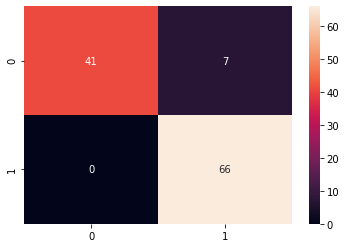

In [58]:
sns.heatmap(cm,annot=True);

In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



### Improving the model

In [25]:
min_train = X_train.min()

In [26]:
range_train = (X_train-min_train).max()

In [27]:
 X_train_scaled = (X_train - min_train)/range_train

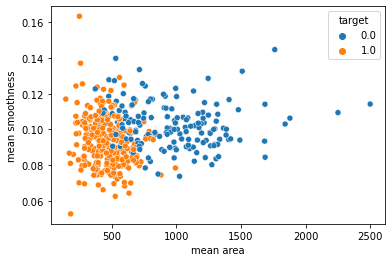

In [28]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'],hue = y_train);

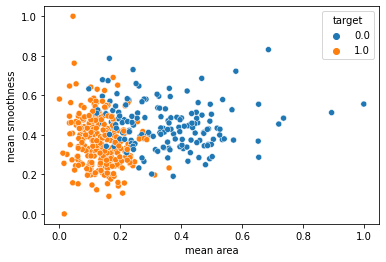

In [29]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'],hue = y_train);

In [39]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [40]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [41]:
y_predict = svc_model.predict(X_test_scaled)

In [42]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [43]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

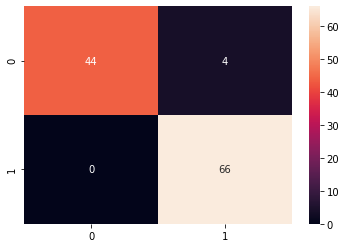

In [44]:
sns.heatmap(cm, annot=True) 

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Improving model 2

In [86]:
param_grid = {'C' : [ 1], 'gamma' : [1], 'kernel' : ['rbf']}

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose=1)

In [89]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': [1], 'kernel': ['rbf']}, verbose=1)

In [90]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [91]:
grid_predictions = grid.predict(X_test_scaled)

In [92]:
cm = confusion_matrix(y_test, grid_predictions)

<AxesSubplot:>

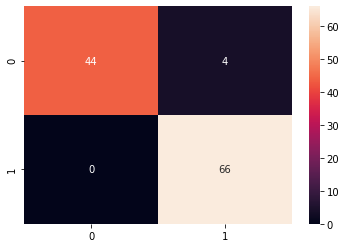

In [93]:
sns.heatmap(cm, annot=True)